In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'DejaVu Sans'

plt.rcParams['text.usetex'] = True

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


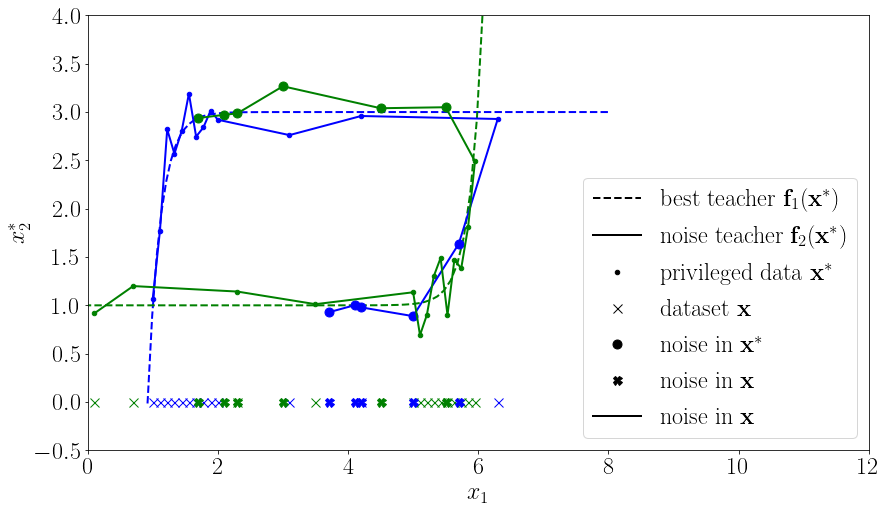

In [3]:
Text_size = 24

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 9
plt.rcParams['xtick.labelsize'] = Text_size
plt.rcParams['ytick.labelsize'] = Text_size
plt.rcParams['legend.fontsize'] = Text_size
plt.rcParams['axes.titlesize']=Text_size
plt.rcParams['axes.labelsize']=Text_size
plt.rcParams['figure.figsize'] = (14.0, 8.0)
plt.rcParams['font.size'] = Text_size
#################################################

colors=['blue', 'green']
np.random.seed(5)

x_1 = np.linspace(0.92, 8, 100)
x_2 = np.linspace(-2, 8, 100)

func_1 = lambda x:  1+2-300*np.exp(-5*x)
func_2 = lambda x:  1+2*1e-13*np.exp(5*x)

plt.plot([100, 100], [100, 100], '--', color='black', label='best teacher $\mathbf{f}_1(\mathbf{x}^*)$')
plt.plot([100, 100], [100, 100], '-', color='black', label='noise teacher $\mathbf{f}_2(\mathbf{x}^*)$')
plt.plot([100, 100], [100, 100], '.', color='black', label='privileged data $\mathbf{x}^*$')
plt.plot([100, 100], [100, 100], 'x', color='black', label='dataset $\mathbf{x}$')
plt.plot([100, 100], [100, 100], 'o', color='black', label='noise in $\mathbf{x}^*$')
plt.plot([100, 100], [100, 100], 'X', color='black', label='noise in $\mathbf{x}$')

plt.plot([100, 100], [100, 100], '-', color='black', label='noise in $\mathbf{x}$')

plt.plot(x_1, func_1(x_1), '--', color=colors[0])
plt.plot(x_2, func_2(x_2), '--', color=colors[1])

points_1 = np.array(np.linspace(1,2, 10).tolist()+[3.1, 4.2, 6.3])
points_2 = np.array(np.linspace(5,5.95, 10).tolist()+[0.1, 0.7, 2.3, 3.5])

y_1 = func_1(points_1) + 0.2*np.random.randn(len(points_1))
y_2 = func_2(points_2) + 0.2*np.random.randn(len(points_2))

plt.plot(points_1, y_1, '.', color=colors[0])
plt.plot(points_2, y_2, '.', color=colors[1])

plt.plot(points_1, y_1*0, 'x', color=colors[0])
plt.plot(points_2, y_2*0, 'x', color=colors[1])

noise_points_1 = np.array([3.7, 4.1, 4.2, 5.7, 5])
noise_points_2 = np.array([1.7, 2.1, 2.3, 5.5, 4.5, 3])

noise_y_1 = func_2(noise_points_1) + 0.2*np.random.randn(len(noise_points_1))
noise_y_2 = func_1(noise_points_2) + 0.2*np.random.randn(len(noise_points_2))

plt.plot(noise_points_1, noise_y_1, 'o', color=colors[0])
plt.plot(noise_points_2, noise_y_2, 'o', color=colors[1])

plt.plot(noise_points_1, noise_y_1*0, 'X', color=colors[0])
plt.plot(noise_points_2, noise_y_2*0, 'X', color=colors[1])


index_1 = np.argsort(points_1)
noise_index_1 = np.argsort(noise_points_1)[::-1]
plt.plot(np.array(points_1[index_1].tolist() + noise_points_1[noise_index_1].tolist()), np.array(y_1[index_1].tolist() + noise_y_1[noise_index_1].tolist()), color=colors[0])

index_2 = np.argsort(points_2)
noise_index_2 = np.argsort(noise_points_2)[::-1]
plt.plot(np.array(points_2[index_2].tolist() + noise_points_2[noise_index_2].tolist()), np.array(y_2[index_2].tolist() + noise_y_2[noise_index_2].tolist()), color=colors[1])

plt.ylabel('$x^*_2$')
plt.xlabel('$x_1$')

plt.xlim((0, 12))
plt.ylim((-0.5, 4))

plt.legend(loc='best')

plt.savefig('./figures/explanation.eps', bbox_inches='tight')
plt.show()